In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
output_dir = 'generate_csv'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
def save_to_csv(output_dir, data, name_prefix, 
                header=None, n_parts=10):
    path_format = os.path.join(output_dir, '{}_{:02d}.csv')
    filenames = []
    
    for file_idx, row_indices in enumerate(
        np.array_split(np.arange(len(data)), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filenames.append(part_csv)
        with open(part_csv, 'wt', encoding='utf-8') as f:
            if header is not None:
                f.write(header + '\n')
            for row_index in row_indices:
                f.write(','.join(
                [repr(col) for col in data[row_index]]))
                f.write('\n')
    
    return filenames

train_data = np.c_[x_train_scaled, y_train]
valid_data = np.c_[x_valid_scaled, y_valid]
test_data = np.c_[x_test_scaled, y_test]
header_cols = housing.feature_names + ['MidianHouseValue']
header_str = ','.join(header_cols)

train_filenames = save_to_csv(output_dir, train_data, 'train', header_str, n_parts=20)
valid_filenames = save_to_csv(output_dir, valid_data, 'valid', header_str, n_parts=10)
test_filenames = save_to_csv(output_dir, valid_data, 'test', header_str, n_parts=10)

In [7]:
import pprint
print('train filenames:')
pprint.pprint(train_filenames)
print('valid filenames:')
pprint.pprint(valid_filenames)
print('test filenames:')
pprint.pprint(test_filenames)

train filenames:
['generate_csv/train_00.csv',
 'generate_csv/train_01.csv',
 'generate_csv/train_02.csv',
 'generate_csv/train_03.csv',
 'generate_csv/train_04.csv',
 'generate_csv/train_05.csv',
 'generate_csv/train_06.csv',
 'generate_csv/train_07.csv',
 'generate_csv/train_08.csv',
 'generate_csv/train_09.csv',
 'generate_csv/train_10.csv',
 'generate_csv/train_11.csv',
 'generate_csv/train_12.csv',
 'generate_csv/train_13.csv',
 'generate_csv/train_14.csv',
 'generate_csv/train_15.csv',
 'generate_csv/train_16.csv',
 'generate_csv/train_17.csv',
 'generate_csv/train_18.csv',
 'generate_csv/train_19.csv']
valid filenames:
['generate_csv/valid_00.csv',
 'generate_csv/valid_01.csv',
 'generate_csv/valid_02.csv',
 'generate_csv/valid_03.csv',
 'generate_csv/valid_04.csv',
 'generate_csv/valid_05.csv',
 'generate_csv/valid_06.csv',
 'generate_csv/valid_07.csv',
 'generate_csv/valid_08.csv',
 'generate_csv/valid_09.csv']
test filenames:
['generate_csv/test_00.csv',
 'generate_csv/test_0

In [8]:
# 1. filename -> dataset
# 2. read file -> dataset -> datasets -> merge
# 3. parse csv

filename_dataset = tf.data.Dataset.list_files(train_filenames)
for filename in filename_dataset:
    print(filename)

tf.Tensor(b'generate_csv/train_05.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_02.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_11.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_06.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_17.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_13.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_10.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_04.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_16.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_08.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_12.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_00.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_09.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_15.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_07.csv', shape=(), dtype=string)
tf.Tensor(b'generate_csv/train_01.csv', 

In [9]:
n_readers = 5
dataset = filename_dataset.interleave(
    lambda filename: tf.data.TextLineDataset(filename).skip(1),
    cycle_length = n_readers,
)

for line in dataset.take(15):
    print(line.numpy())

b'0.04326300977263167,-1.0895425985107923,-0.38878716774583305,-0.10789864528874438,-0.6818663605100649,-0.0723871014747467,-0.8883662012710817,0.8213992340186296,1.426'
b'-1.0591781535672364,1.393564736946074,-0.026331968874673636,-0.11006759528831847,-0.6138198966579805,-0.09695934953589447,0.3247131133362288,-0.037477245413977976,0.672'
b'0.09734603446040174,0.7527628439249472,-0.20218964416999152,-0.1954700015215477,-0.4060513603629498,0.006785531677655949,-0.813715166526018,0.656614793197258,1.119'
b'0.4853051504718848,-0.8492418886278699,-0.06530126513877861,-0.023379656040017353,1.4974350551260218,-0.07790657783453239,-0.9023632702857819,0.7814514907892068,2.956'
b'-0.32652634129448693,0.43236189741438374,-0.09345459539684739,-0.08402991822890092,0.8460035745154013,-0.0266316482653991,-0.5617679242614233,0.1422875991184281,2.431'
b'-0.7543417158936074,-0.9293421252555106,-0.9212720434835953,0.1242806741969112,-0.5983960315181748,-0.18494335623235414,-0.8183808561975836,0.8513600

In [10]:
# tf.io.decode_csv(str, record_defaults)

sample_str = '1,2,3,4,5'
# record_defaults = [tf.constant(0, dtype=tf.int32)]
record_defaults = [
    tf.constant(0, dtype=tf.int32),
    0,
    np.nan,
    'hello',
    tf.constant([])
]
parsed_fields = tf.io.decode_csv(sample_str, record_defaults)
print(parsed_fields)

[<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, <tf.Tensor: shape=(), dtype=string, numpy=b'4'>, <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]


In [11]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Field 4 is required but missing in record 0! [Op:DecodeCSV]


In [12]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [13]:
def parse_csv_line(line, n_fields=9):
    defs = [tf.constant(np.nan)] * n_fields
    parsed_fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(parsed_fields[0:-1])
    y = tf.stack(parsed_fields[-1:])
    return x, y

parse_csv_line(b'-0.6906143291679195,-0.1283397589791022,7.0201810347470595,5.624287386169439,-0.2663292879200034,-0.03662080416157129,-0.6457503383496215,1.2058962626018372,1.352', 
               n_fields=9)

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-0.69061434, -0.12833975,  7.020181  ,  5.6242876 , -0.2663293 ,
        -0.0366208 , -0.64575034,  1.2058963 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.352], dtype=float32)>)

In [14]:
# 1. filename -> dataset
# 2. read file -> dataset -> datasets -> merge
# 3. parse csv
def csv_reader_dataset(filenames, n_readers=5, 
                       batch_size=32, n_parse_threads=5,
                       shuffle_buffer_size=10000):
    dataset = tf.data.Dataset.list_files(filenames)
    dataset = dataset.repeat()
    dataset = dataset.interleave(
        lambda filename: tf.data.TextLineDataset(filename).skip(1),
        cycle_length = n_readers
    )
    dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(parse_csv_line, 
                          num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset

train_set = csv_reader_dataset(train_filenames, batch_size=3)
for x_batch, y_batch in train_set.take(2):
    print('x:')
    pprint.pprint(x_batch)
    print('y:')
    pprint.pprint(y_batch)

x:
<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
array([[-1.119975  , -1.3298433 ,  0.14190045,  0.4658137 , -0.10301778,
        -0.10744184, -0.7950524 ,  1.5304717 ],
       [-1.119975  , -1.3298433 ,  0.14190045,  0.4658137 , -0.10301778,
        -0.10744184, -0.7950524 ,  1.5304717 ],
       [-1.119975  , -1.3298433 ,  0.14190045,  0.4658137 , -0.10301778,
        -0.10744184, -0.7950524 ,  1.5304717 ]], dtype=float32)>
y:
<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.66],
       [0.66],
       [0.66]], dtype=float32)>
x:
<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
array([[-1.119975  , -1.3298433 ,  0.14190045,  0.4658137 , -0.10301778,
        -0.10744184, -0.7950524 ,  1.5304717 ],
       [-1.119975  , -1.3298433 ,  0.14190045,  0.4658137 , -0.10301778,
        -0.10744184, -0.7950524 ,  1.5304717 ],
       [-0.9490939 ,  0.6726626 ,  0.28370556,  0.1065553 , -0.65464777,
        -0.06239493,  0.21273656,  0.0024705 ]], dtype=float32)>
y:
<tf.Tensor: shape=(3, 

In [15]:
batch_size = 32
train_set = csv_reader_dataset(train_filenames, batch_size=batch_size)
valid_set = csv_reader_dataset(valid_filenames, batch_size=batch_size)
test_set = csv_reader_dataset(test_filenames, batch_size=batch_size)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                      input_shape=[8]),
    keras.layers.Dense(1),
])
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

In [17]:
history = model.fit(train_set,
                   validation_data=valid_set,
                   steps_per_epoch=11160 // batch_size,
                    validation_steps =3780 // batch_size,
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
348/348 [==============================] - 0s 1ms/step - loss: 0.7417 - val_loss: 0.5364
Epoch 2/100
348/348 [==============================] - 0s 1ms/step - loss: 0.5042 - val_loss: 0.4735
Epoch 3/100
348/348 [==============================] - 0s 1ms/step - loss: 0.4630 - val_loss: 0.4429
Epoch 4/100
348/348 [==============================] - 0s 1ms/step - loss: 0.4346 - val_loss: 0.4287
Epoch 5/100
348/348 [==============================] - 0s 1ms/step - loss: 0.4178 - val_loss: 0.4176
Epoch 6/100
348/348 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.4212
Epoch 7/100
348/348 [==============================] - 0s 1ms/step - loss: 0.4017 - val_loss: 0.4063
Epoch 8/100
348/348 [==============================] - 0s 1ms/step - loss: 0.3931 - val_loss: 0.3972
Epoch 9/100
348/348 [==============================] - 0s 1ms/step - loss: 0.3906 - val_loss: 0.3899
Epoch 10/100
348/348 [==============================] - 0s 1ms/step - loss: 0.3860 - val_lo

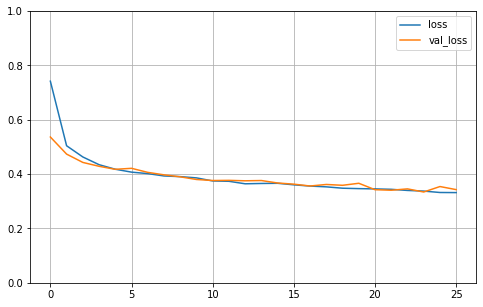

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [20]:
model.evaluate(test_set, steps = 5160 // batch_size)

161/161 [==============================] - 0s 802us/step - loss: 0.3286


0.3286432921886444